## Task-1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("heart.csv")
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

def impute_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   upper = df[~(df>(q3+1.5*IQR))].max()

   lower = df[~(df<(q1-1.5*IQR))].min()

   df = np.where(df > upper,

       df.mean(),

       np.where(

           df < lower,

           df.mean(),

           df

           )

       )


   return pd.Series(df)

In [ ]:
for col in df.columns:
  temp = df[col]
  if temp.dtype == 'float64' or temp.dtype == 'int':
    outliers=find_outliers_IQR(temp)
    print('Number of outliers in '+ col + ": ", len(outliers))

Number of outliers in age:  0
Number of outliers in sex:  0
Number of outliers in cp:  0
Number of outliers in trtbps:  9
Number of outliers in chol:  5
Number of outliers in fbs:  45
Number of outliers in restecg:  0
Number of outliers in thalachh:  1
Number of outliers in exng:  0
Number of outliers in oldpeak:  5
Number of outliers in slp:  0
Number of outliers in caa:  25
Number of outliers in thall:  2
Number of outliers in output:  0


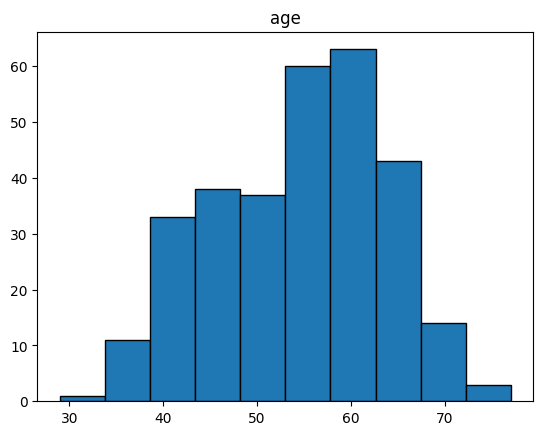

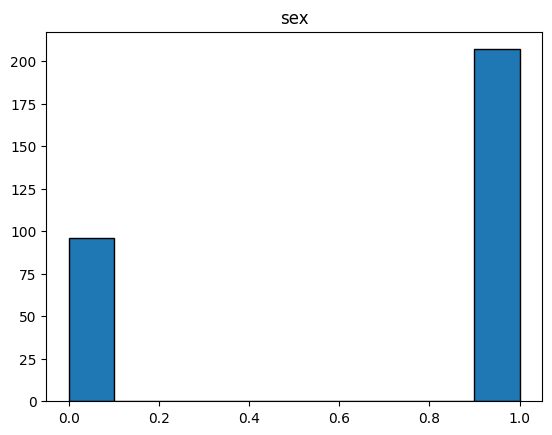

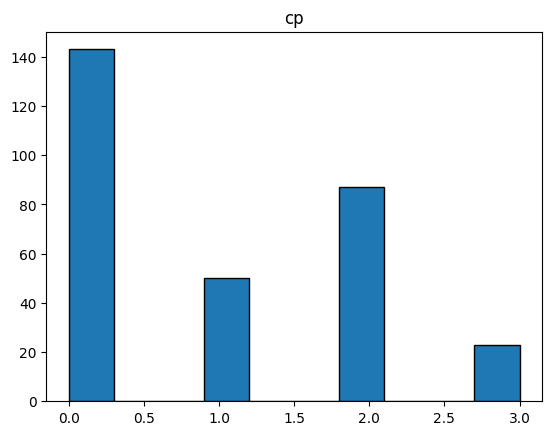

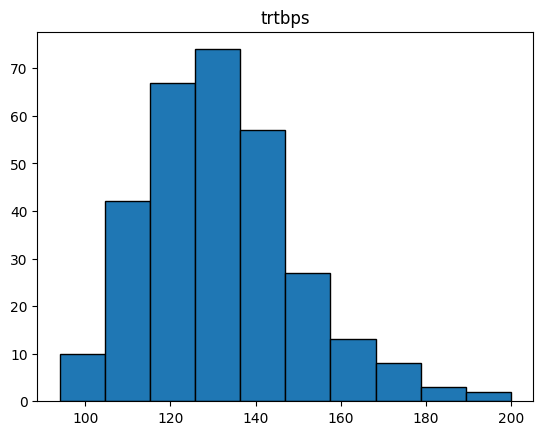

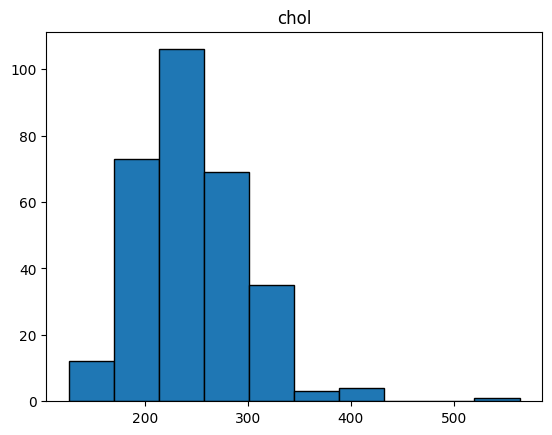

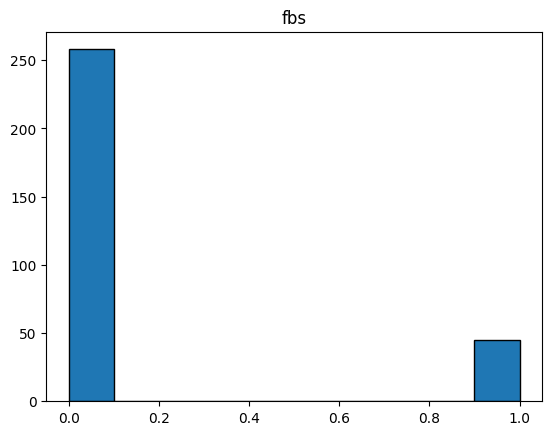

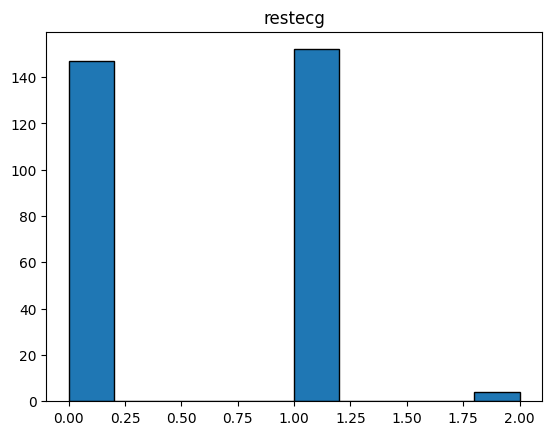

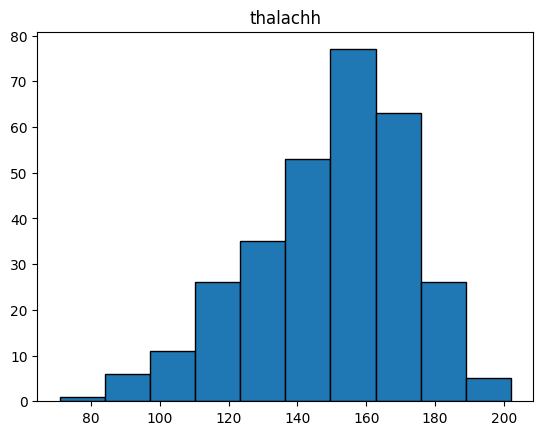

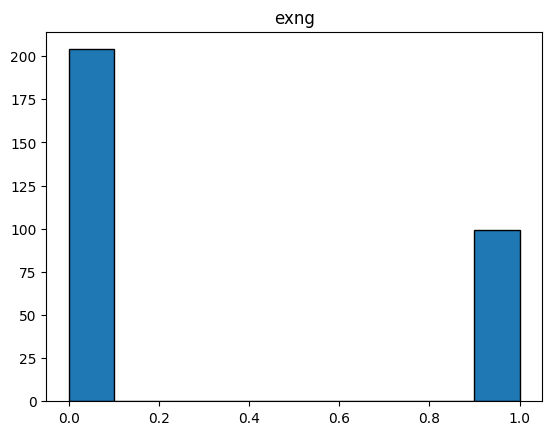

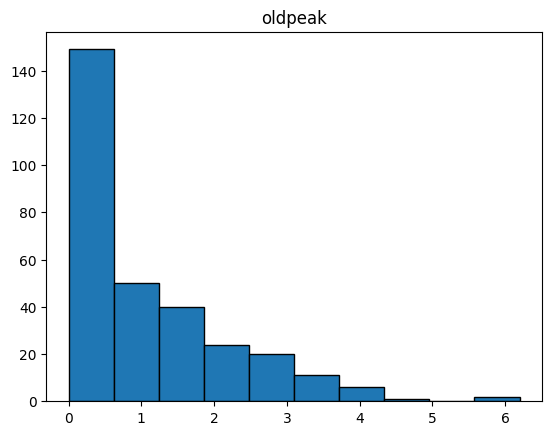

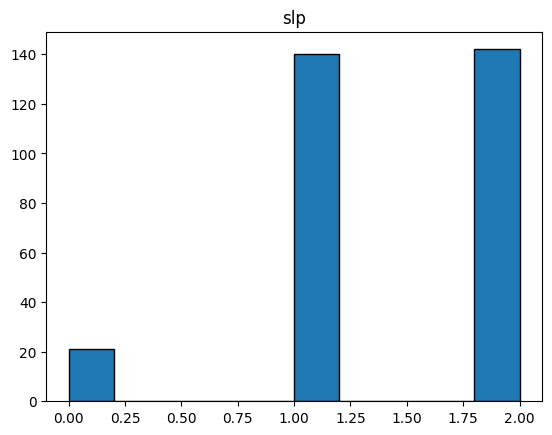

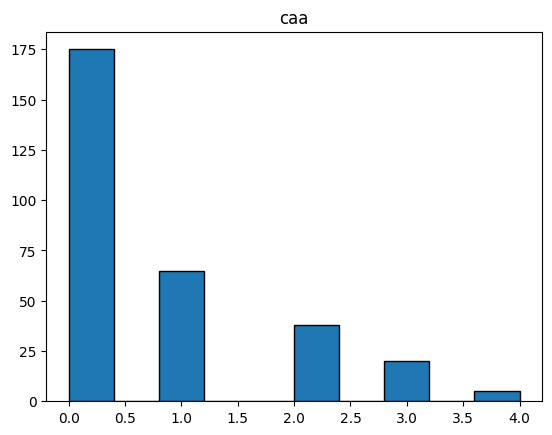

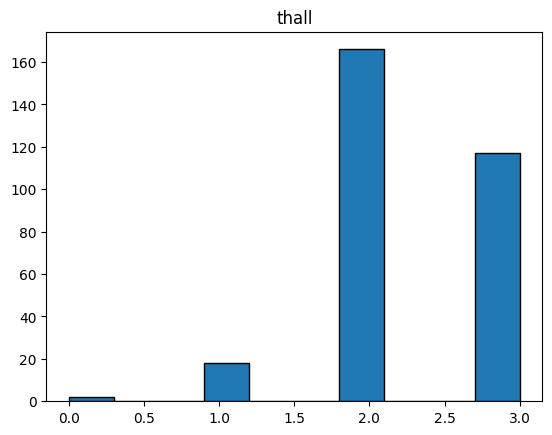

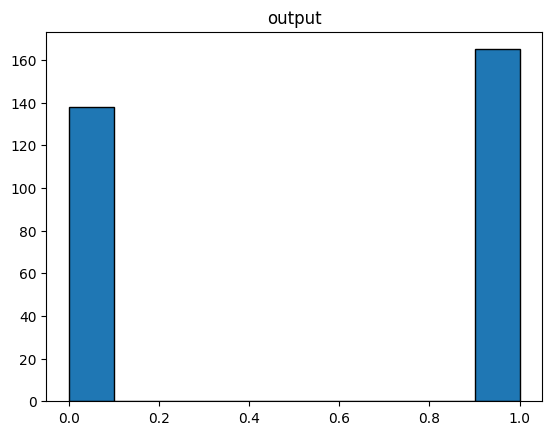

In [ ]:
for col in df.columns:
  plt.hist(df[col],ec='black')
  plt.title(col)
  plt.show()

<Axes: >

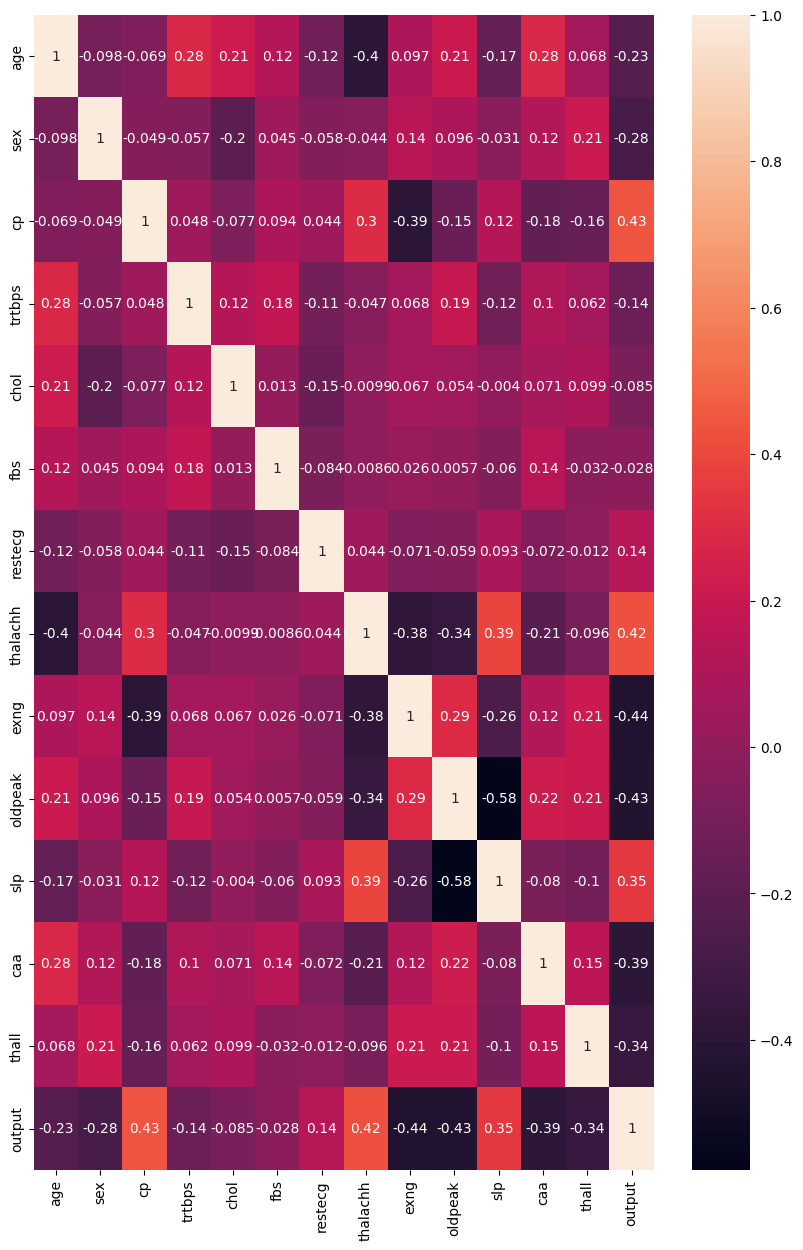

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,15))
sns.heatmap(df.corr(),annot=True)

In [ ]:
import scipy.stats as stats

# Assuming you have your data loaded in the 'df' DataFrame

# Separating data into two groups based on heart disease presence or absence
cholesterol_with_disease = df[df['output'] == 1]['chol']
cholesterol_without_disease = df[df['output'] == 0]['chol']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(cholesterol_with_disease, cholesterol_without_disease)

# Interpreting the results
alpha = 0.05
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Result: Reject the null hypothesis.")
    print("Interpretation: There is a significant difference in cholesterol levels between patients with and without heart disease.")
else:
    print("Result: Fail to reject the null hypothesis.")
    print("Interpretation: There is no significant difference in cholesterol levels between patients with and without heart disease.")



T-statistic: -1.4842450762526977
P-value: 0.13879032695600638
Result: Fail to reject the null hypothesis.
Interpretation: There is no significant difference in cholesterol levels between patients with and without heart disease.


In [ ]:
# Calculating the mean and standard deviation for each group
mean_cholesterol_with_disease = cholesterol_with_disease.mean()
mean_cholesterol_without_disease = cholesterol_without_disease.mean()

std_cholesterol_with_disease = cholesterol_with_disease.std()
std_cholesterol_without_disease = cholesterol_without_disease.std()

# Calculating the sample size for each group
n_with_disease = len(cholesterol_with_disease)
n_without_disease = len(cholesterol_without_disease)

confidence_level = 0.95

# Calculate the critical value (for 2-tailed test)
critical_value = stats.t.ppf((1 + confidence_level) / 2, n_with_disease + n_without_disease - 2)

# Calculating the standard error for each group
se_cholesterol_with_disease = std_cholesterol_with_disease / np.sqrt(n_with_disease)
se_cholesterol_without_disease = std_cholesterol_without_disease / np.sqrt(n_without_disease)

# Calculating the confidence intervals
ci_with_disease = (mean_cholesterol_with_disease - critical_value * se_cholesterol_with_disease,
                   mean_cholesterol_with_disease + critical_value * se_cholesterol_with_disease)

ci_without_disease = (mean_cholesterol_without_disease - critical_value * se_cholesterol_without_disease,
                      mean_cholesterol_without_disease + critical_value * se_cholesterol_without_disease)

print(f"Confidence Interval for Mean Cholesterol Levels (With Heart Disease): {ci_with_disease}")
print(f"Confidence Interval for Mean Cholesterol Levels (Without Heart Disease): {ci_without_disease}")

Confidence Interval for Mean Cholesterol Levels (With Heart Disease): (234.0260577221913, 250.43454833841474)
Confidence Interval for Mean Cholesterol Levels (Without Heart Disease): (242.80247914694064, 259.3714338965376)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

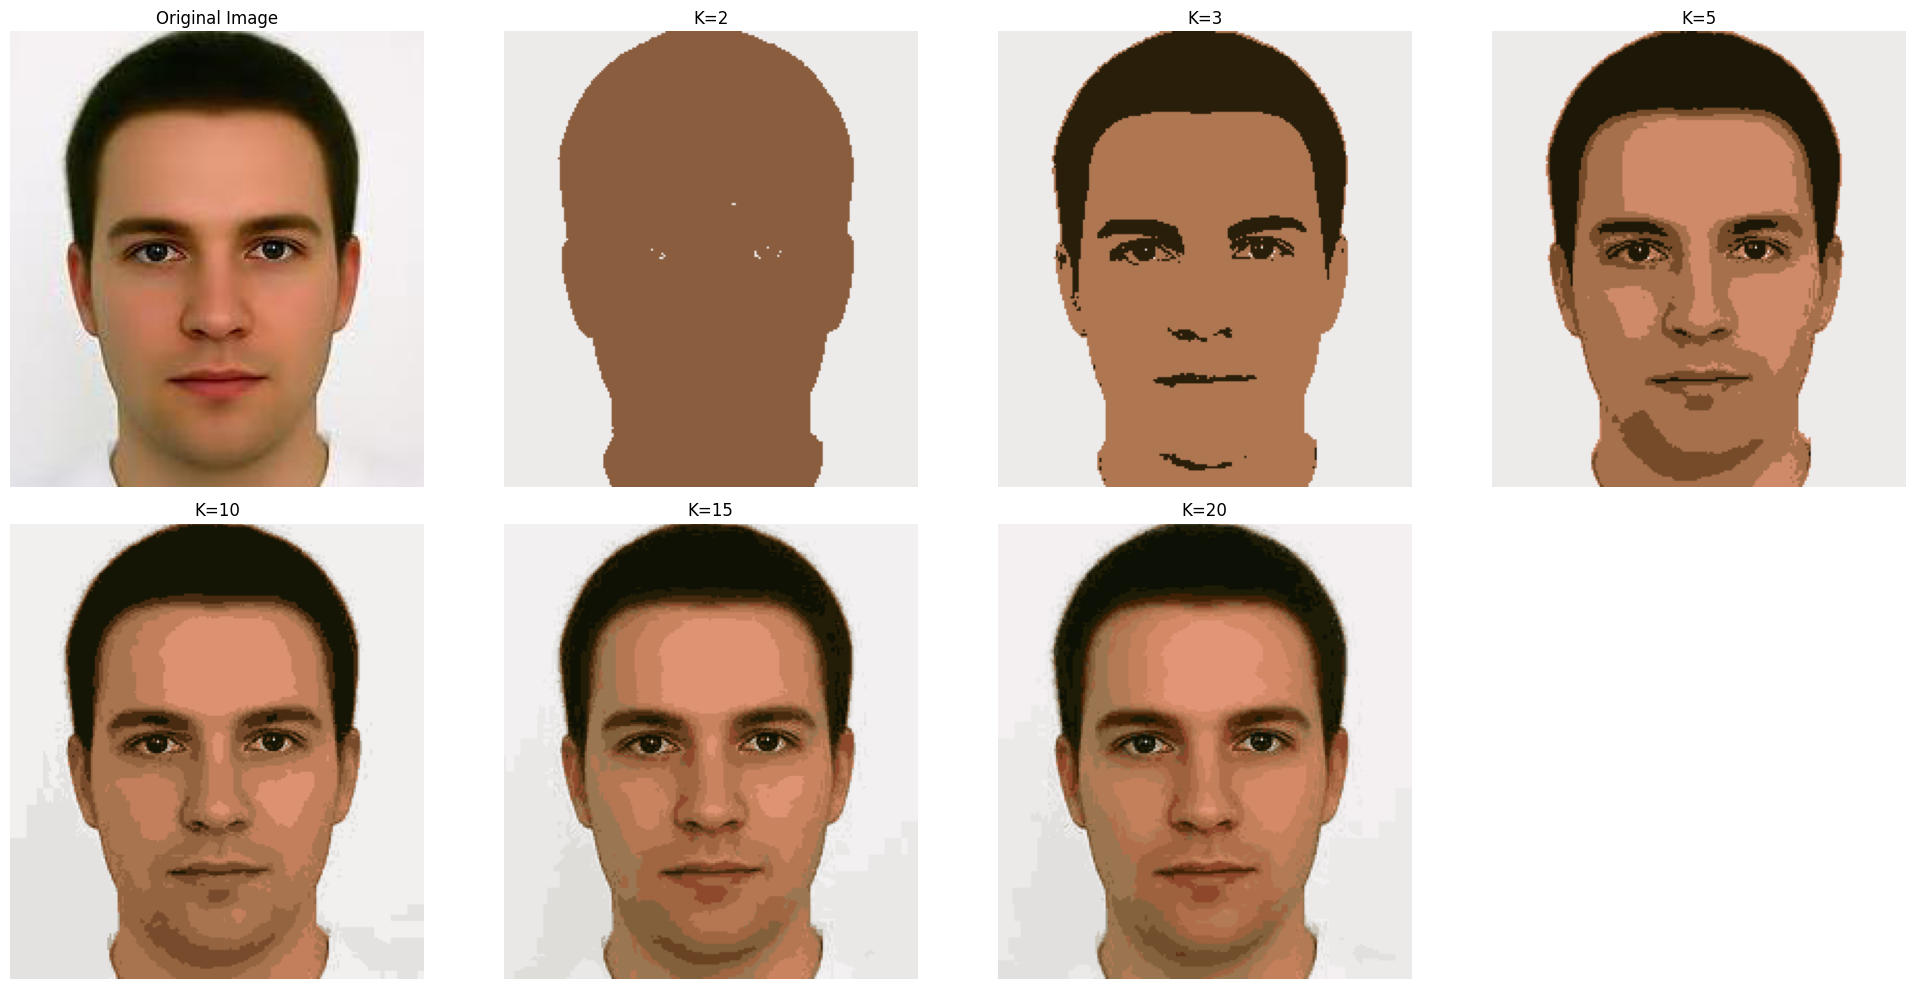

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the image
path = 'face.jpg'
image = Image.open(path)
arr = np.array(image)

# Reshape the image for clustering
final_img = arr.reshape(-1, 3)

# Define different values of K (number of clusters)
vals = [2, 3, 5, 10, 15, 20]

# Initialize a list to store the clustered images
cluster_img = []

# Perform K-Means clustering for each value of K
for i in vals:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(final_img)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    segmented = centers[labels].reshape(arr.shape)
    cluster_img.append(segmented)

# Display the original image and clustered images using subplots
plt.figure(figsize=(20, 10))

# Plot the original image
plt.subplot(2, 4, 1)
plt.imshow(arr)
plt.title('Original Image')
plt.axis('off')

# Plot the clustered images
for i in range(len(cluster_img)):
    plt.subplot(2, 4, i + 2)
    plt.imshow(cluster_img[i].astype('uint8'))
    plt.title(f'K={vals[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()



For K=2, the image was represented with only two dominant colors, resulting in a binary-like representation with a loss of fine details.

When K was increased to 3, the image segmentation improved, and more colors were used to represent different regions of the image, leading to a better color diversity and capturing more details.

As K was further increased to 5, the image segmentation continued to improve, displaying even finer details and a higher level of color resolution.

For K=10, 15, and 20, the image segmentation became more intricate, capturing even more fine details and offering a more realistic appearance with a wider range of colors.



